## ___Feature Selection with Filtering Method___

_Filter methods are also called as __Single Factor Analysis__. Using this method, the predictive power of each individual variable (feature) is evaluated. Various statistical means can be used to determine predictive power._

1. ___Univariate Analysis:___ _Individual Feature is ranked according to the sepcific creteria, Top N features are then selected._

_e.g. Variance, Mutual Information Gain, Fisher's Score, etc._

2. ___Multivariate Analysis:___ _In multivariate analysis, correlation between the group of features help to identify the redundant features in the dataset._

_e.g. Pearson Correlation_

#### ___Dataset Used:___ _https://www.kaggle.com/c/santander-customer-satisfaction_

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/PiyushSin/Downloads/santander/train.csv")

In [3]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
# Building Random Forest model for comparison and calculating efficiency.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

### ___Univariate Feature Selection___

In [6]:
X = dataset.drop('TARGET', axis = 1)
y = dataset['TARGET']

X.shape, y.shape

((76020, 370), (76020,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

#### ___1. Constant Feature Removal___

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
constant_features = VarianceThreshold(threshold = 0) # defining constant features as Variance = 0 

In [10]:
constant_features.fit(X_train)

VarianceThreshold(threshold=0)

In [11]:
constant_features.get_support().sum() # 334 features are not constant

334

In [12]:
non_constant_feature = constant_features.get_support()

X.columns[~non_constant_feature] # This gives us list of constant features

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var17_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [13]:
X_train_filter = constant_features.transform(X_train)
X_test_filter = constant_features.transform(X_test)

In [14]:
X_train_filter.shape, X_test_filter.shape

((60816, 334), (15204, 334))

#### ___2. Quasi Constant Feature Removal___

In [15]:
quasi_constant_features = VarianceThreshold(threshold = 0.01) # only 1% of non similar values

In [16]:
quasi_constant_features.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_features.get_support().sum() # we are now left with 274 features

274

In [18]:
X_train_filter = quasi_constant_features.transform(X_train_filter)
X_test_filter = quasi_constant_features.transform(X_test_filter)

In [19]:
X_train_filter.shape, X_test_filter.shape

((60816, 274), (15204, 274))

In [20]:
X_train.shape[1] - X_train_filter.shape[1] # total 96 features removed till now

96

#### ___3. Duplicate Feature Removal___

_There is no direct way to remove duplicate columns, so we are going to transpose the dataset and use duplicated function from pandas._

In [21]:
X_train_filter_T = X_train_filter.T
X_test_filter_T = X_test_filter.T

In [22]:
X_train_filter_T = pd.DataFrame(X_train_filter_T)
X_test_filter_T = pd.DataFrame(X_test_filter_T)

In [23]:
X_train_filter_T.duplicated().sum() # This gives us the duplicated rows

17

In [24]:
X_train_filter_T[~X_train_filter_T.duplicated()]
X_test_filter_T[~X_train_filter_T.duplicated()] # dropping same features

,0,1,2,3,4,5,6,7,8,9,...,15194,15195,15196,15197,15198,15199,15200,15201,15202,15203
0,38893.00,133597.00,24908.00,19551.0,36051.00,133938.00,126540.00,12981.00,67175.00,118275.00,...,25055.00,47566.00,60527.00,63495.00,125788.00,28686.00,66259.000000,44895.00,33938.00,62793.00
1,2.00,2.00,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.000000,2.00,2.00,2.00
2,23.00,52.00,23.00,9.0,23.00,26.00,28.00,29.00,23.00,33.00,...,36.00,24.00,30.00,26.00,29.00,30.00,28.000000,26.00,76.00,23.00
3,0.00,0.00,0.00,900.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,150.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
4,0.00,0.00,0.00,0.0,0.00,153.60,0.00,0.00,0.00,649.44,...,2330.40,111.24,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
270,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
271,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
272,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00


In [25]:
X_train_filter = X_train_filter_T.T
X_test_filter = X_test_filter_T.T

In [26]:
X_train_filter.shape, X_test_filter.shape

((60816, 274), (15204, 274))

#### ___Lets do the first comparison___

In [27]:
# model without filtered data
%time run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9575769534333071
Wall time: 24.7 s


In [28]:
# model with filtered data
%time run_randomForest(X_train_filter, X_test_filter, y_train, y_test)

Accuracy:  0.9577742699289661
Wall time: 20.1 s


#### ___4. Mutual Information (Entropy) Gain / Information Value___

_Mutual Information gain is measure of dependence between 2 random variable is always symmetric and non-negative. If MI is zero that means features are independent._

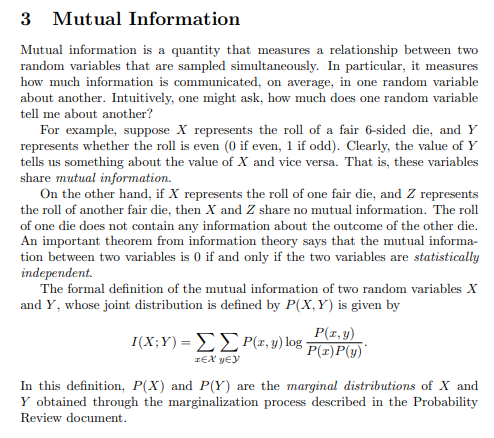

In [72]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

##### ___Classification___

In [73]:
ml_info = mutual_info_classif(X_train_filter, y_train)

In [74]:
len(ml_info)

274

In [75]:
ml_info = pd.Series(ml_info)
ml_info.index = X_train_filter.columns

In [76]:
ml_info.sort_values(ascending = False, inplace = True)

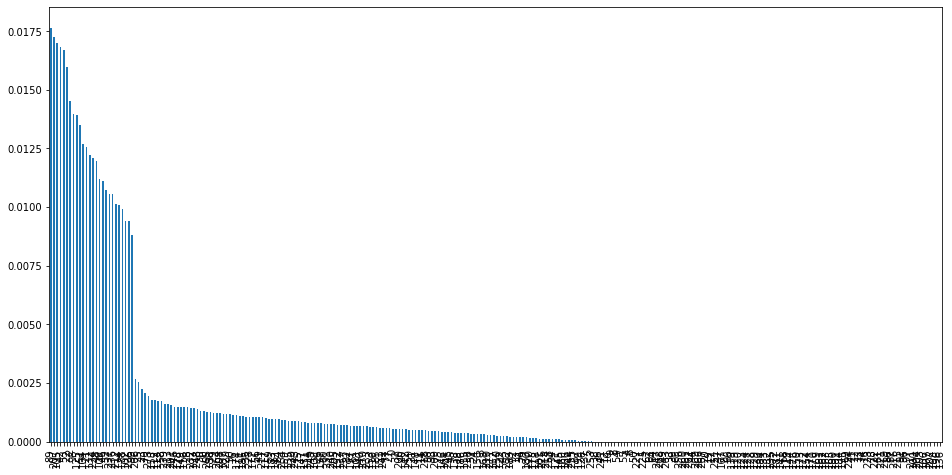

In [78]:
ml_info.plot.bar(figsize = (16,8))

In [79]:
sel = SelectPercentile(mutual_info_classif, percentile =10).fit(X_train_filter, y_train) 

In [80]:
X_train_filter.columns[sel.get_support()]

Int64Index([  2,  21,  22,  42,  46,  48,  51,  52,  53,  88,  89,  95,  99,
            102, 104, 105, 109, 121, 125, 132, 134, 207, 212, 234, 235, 236,
            237, 273],
           dtype='int64')

In [82]:
X_train_filter_mi = sel.transform(X_train_filter)
X_test_filter_mi = sel.transform(X_test_filter)

In [83]:
# model with filtered data
%time run_randomForest(X_train_filter_mi, X_test_filter_mi, y_train, y_test)

Accuracy:  0.9510655090765588
Wall time: 7.8 s


##### _Regression_ 

In [86]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
boston = load_boston()

In [88]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [93]:
data_boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
data_boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
data_boston_y = boston.target

In [97]:
bX_train, bX_test, by_train, by_test = train_test_split(data_boston_X,data_boston_y, test_size = 0.2, random_state = 0)

In [98]:
ml_reg = mutual_info_regression(bX_train,by_train)

In [99]:
ml_reg = pd.Series(ml_reg)
ml_reg.index = bX_train.columns

In [100]:
ml_reg.sort_values(ascending = False, inplace = True)

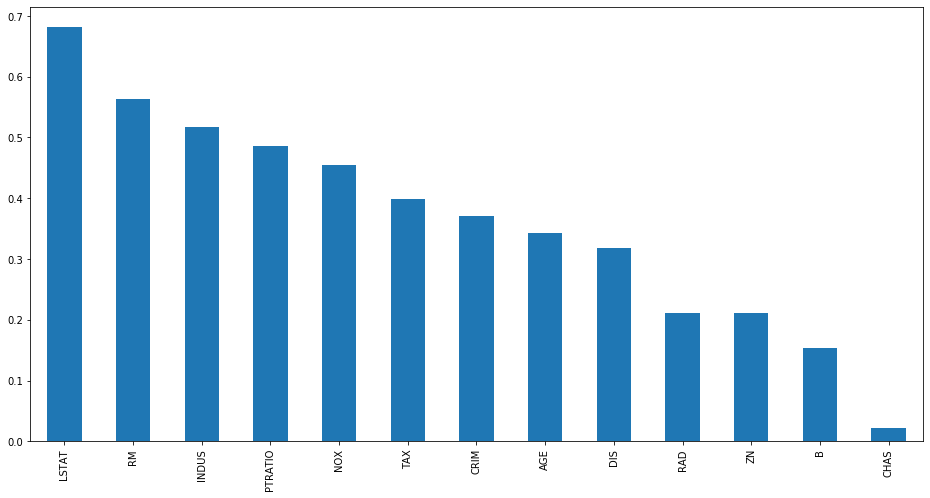

In [101]:
ml_reg.plot.bar(figsize = (16,8))

In [103]:
sel = SelectKBest(mutual_info_regression, k=9).fit(bX_train, by_train)
bX_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [104]:
model = LinearRegression()
model.fit(bX_train, by_train)
y_predict = model.predict(bX_test)

In [105]:
r2_score(by_test, y_predict)

0.5892223849182507

In [106]:
np.sqrt(mean_squared_error(by_test,y_predict))

5.783509315085135

In [107]:
bX_train_mi = sel.transform(bX_train)
bX_test_mi = sel.transform(bX_test)

In [108]:
model = LinearRegression()
model.fit(bX_train_mi, by_train)
y_predict = model.predict(bX_test_mi)

In [109]:
r2_score(by_test, y_predict)

0.531712760696157

In [110]:
np.sqrt(mean_squared_error(by_test,y_predict)) 
# this feature selection didn't perform better, therefore it is not necessary to get better accuracy by using feature selection

6.175103151293751

#### ___5. Feature Selection using ROC-AUC and RMSE___

##### ___Feature Selection using ROC Curve___

_**Receiver Operator Characteristic (ROC)** curve is a well know Classification performance metrics. Owing to its superiority in dealing  with imbalanced and cost-sensitive data, the ROC curve has been exploited as a popular metric to evaluate ML model._

_AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability._

_It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease._

_The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis._

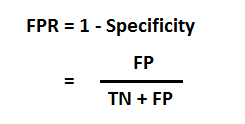

___TPR (True Positive Rate) / Recall /Sensitivity:___

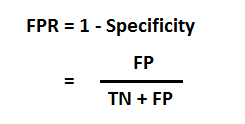

___Specificity:___

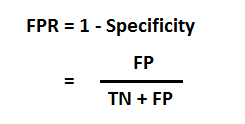

___FPR:___

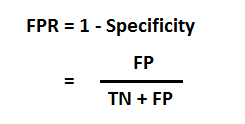

In [111]:
from sklearn.metrics import roc_auc_score

In [113]:
roc_score = []

for feature in X_train_filter.columns:
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    clf.fit(X_train_filter[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_filter[feature].to_frame())
    roc_score.append(roc_auc_score(y_test, y_pred))

In [114]:
roc_score = pd.Series(roc_score)
roc_score.index = X_test_filter.columns
roc_score.sort_values(ascending = False, inplace = True)

In [115]:
roc_score

18     0.505729
15     0.505729
0      0.503489
273    0.503352
241    0.502603
         ...   
123    0.499384
132    0.499367
122    0.499247
234    0.499161
236    0.497672
Length: 274, dtype: float64

In [116]:
# If features value is less than 0.5 then it adds no value to the model
sel  = roc_score[roc_score>0.50]

In [117]:
X_train_roc = X_train_filter[sel.index]
X_test_roc = X_test_filter[sel.index]

In [118]:
# model with filtered data
%time run_randomForest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy:  0.9541568008418837
Wall time: 11.2 s


##### ___Feature Selection using RMSE___

In [122]:
bX_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [128]:
mse_score = []

for feature in bX_train.columns:
    model = LinearRegression()
    model.fit(bX_train[feature].to_frame(), by_train)
    by_pred = model.predict(bX_test[feature].to_frame())
    mse_score.append(mean_squared_error(by_test, by_pred))

In [129]:
mse_score

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.907351627395315,
 80.3915476111525,
 82.61874125667718,
 82.46499985731933,
 78.30831374720843,
 81.79497121208003,
 77.75285601192718,
 46.33630536002592]

In [130]:
mse_score = pd.Series(mse_score)
mse_score.index = bX_train.columns
mse_score.sort_values(ascending = False, inplace = True)

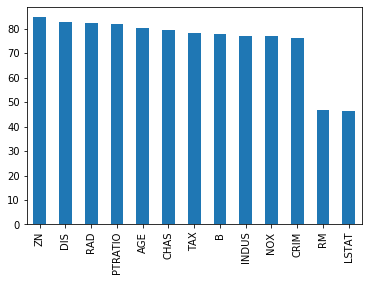

In [131]:
mse_score.plot.bar()

In [143]:
feature_to_be_used = ['RM','LSTAT'] # selected basis MSE, which is half when compared to others.

In [145]:
X_train_mse = bX_train[feature_not_to_be_used]
X_test_mse = bX_test[feature_not_to_be_used]

In [146]:
# selected Feature model
model = LinearRegression()
model.fit(X_train_mse, by_train)
by_pred = model.predict(X_test_mse)
mean_squared_error(by_test, by_pred)

37.38310563877996

In [147]:
np.sqrt(mean_squared_error(by_test, by_pred)) # again the feature selection didn't perform well

6.114172522817782

In [149]:
# original Dataset model
model = LinearRegression()
model.fit(bX_train, by_train)
by_pred = model.predict(bX_test)
mean_squared_error(by_test, by_pred)

33.44897999767653

In [150]:
np.sqrt(mean_squared_error(by_test, by_pred))

5.783509315085135

In [148]:
np.std(data_boston_y)

9.188011545278203

#### ___6. Feature Selection using ANOVA___

___Definition of T-test___

_The t-test is described as the statistical test that examines whether the population means of two samples greatly differ from one another, using t-distribution which is used when the standard deviation is not known, and the sample size is small. It is a tool to analyse whether the two samples are drawn from the same population._

_The test is based on t-statistic, which assumes that variable is normally distributed (symmetric bell-shaped distribution) and mean is known and population variance is calculated from the sample._

_In t-test null hypothesis takes the form of H0: µ(x) = µ(y) against alternative hypothesis H1: µ(x) ≠ µ(y), wherein µ(x) and µ(y) represents the population means. The degree of freedom of t-test is n1 + n2 – 2_ 

_https://www.youtube.com/watch?v=pTmLQvMM-1M_

_https://www.youtube.com/watch?v=Uv6nGIgZMVw_

___Definition of ANOVA___

_Analysis of Variance (ANOVA) is a statistical method, commonly used in all those situations where a comparison is to be made between more than two population means like the yield of the crop from multiple seed varieties. It is a vital tool of analysis for the researcher that enables him to conduct test simultaneously. When we use ANOVA, it is assumed that the sample is drawn from the normally distributed population and the population variance is equal. ANOVA is applied to numerical data._

_In ANOVA, the total amount of variation in a dataset is split into two types, i.e. the amount allocated to chance and amount assigned to particular causes. Its basic principle is to test the variances among population means by assessing the amount of variation within group items, proportionate to the amount of variation between groups. Within the sample, the variance is because of the random unexplained disturbance whereas different treatment may cause between sample variance._

_With the use of this technique, we test, null hypothesis (H0) wherein all population means are the same, or alternative hypothesis (H1) wherein at least one population mean is different._

_https://www.youtube.com/watch?v=qV-WoquC4dA_

##### ___Classification___

In [152]:
from sklearn.feature_selection import f_classif, f_regression

In [153]:
f_c = f_classif(X_train_filter, y_train)

In [154]:
f_c

(array([1.60028075e+00, 1.84231820e+00, 6.52522658e+02, 2.36557297e-02,
        2.05099439e+00, 3.83223378e-03, 1.77031946e-01, 1.04109236e-01,
        1.33788308e+01, 1.49992708e+01, 1.80574837e-01, 1.95323302e+00,
        2.45465884e-02, 4.49785121e+01, 1.90741154e+01, 3.39860395e+01,
        4.73464159e+01, 2.02663283e+01, 3.31639945e+01, 1.82695149e-02,
        1.84925827e-03, 6.89392560e+01, 1.17241000e+03, 1.45343619e+02,
        4.86573726e+01, 9.71447491e+01, 7.33998136e+01, 1.00180026e+02,
        7.69337455e+01, 7.70635605e+01, 2.20649375e+01, 2.16475987e+01,
        1.00574695e+02, 2.76716050e+01, 5.91457347e+01, 6.46245326e+01,
        3.46457548e+01, 2.23588017e+01, 3.19701122e+01, 2.23588017e+01,
        2.41715942e+01, 2.41715942e+01, 1.44767846e+03, 7.65389017e-02,
        7.80145360e-02, 7.80145360e-02, 8.81055018e+01, 3.88108484e-04,
        8.43507555e+01, 1.89142374e-02, 2.51323397e+00, 4.33093661e+02,
        5.21635523e+01, 1.14884833e+03, 1.45008587e+02, 4.865737

In [155]:
p_values = pd.Series(f_c[1])
p_values.index = X_train_filter.columns
p_values.sort_values(ascending = False, inplace = True)

In [156]:
p_values

47      9.842824e-01
20      9.656993e-01
260     9.620539e-01
206     9.610343e-01
5       9.506387e-01
           ...      
22     1.616279e-254
105    1.330379e-256
89     1.112263e-265
207    8.179109e-309
42     4.470468e-313
Length: 274, dtype: float64

In [157]:
p_values_selected = p_values[p_values<0.05] # 0.05 is selected for null hypothesis we can also select 0.01, 0.03 if needed

In [158]:
X_train_f_c = X_train_filter[p_values_selected.index] 
X_test_f_c = X_test_filter[p_values_selected.index] 

In [159]:
# model with filtered data
%time run_randomForest(X_train_f_c, X_test_f_c, y_train, y_test)

Accuracy:  0.9521836358852933
Wall time: 8.68 s


##### ___Regression___

In [160]:
f_r = f_regression(bX_train, by_train)

In [161]:
f_r

(array([ 81.77212064,  81.1475855 , 153.00493431,  13.09583263,
        107.63575126, 397.33191725,  82.83387891,  34.46704936,
         88.68548609, 142.08609712, 187.10308463,  57.67850087,
        535.13194094]),
 array([6.56250348e-18, 8.53455987e-18, 5.27647041e-30, 3.33700835e-04,
        1.67294465e-22, 5.64340813e-62, 4.20176291e-18, 9.08403584e-09,
        3.66673466e-19, 2.94014039e-28, 3.07127177e-35, 2.18386516e-13,
        6.88510971e-76]))

In [163]:
p_values = pd.Series(f_r[1])
p_values.index = bX_train.columns
p_values.sort_values(ascending = False, inplace = True)

In [164]:
p_values

CHAS       3.337008e-04
DIS        9.084036e-09
B          2.183865e-13
ZN         8.534560e-18
CRIM       6.562503e-18
AGE        4.201763e-18
RAD        3.666735e-19
NOX        1.672945e-22
TAX        2.940140e-28
INDUS      5.276470e-30
PTRATIO    3.071272e-35
RM         5.643408e-62
LSTAT      6.885110e-76
dtype: float64

In [174]:
p_values_selected = p_values[p_values<0.05] # 0.05 is selected for null hypothesis we can also select 0.01, 0.03 if needed

In [173]:
p_values_selected

CHAS       3.337008e-04
DIS        9.084036e-09
B          2.183865e-13
ZN         8.534560e-18
CRIM       6.562503e-18
AGE        4.201763e-18
RAD        3.666735e-19
NOX        1.672945e-22
TAX        2.940140e-28
INDUS      5.276470e-30
PTRATIO    3.071272e-35
RM         5.643408e-62
LSTAT      6.885110e-76
dtype: float64

In [168]:
X_train_f_r = bX_train[p_values_selected.index] 
X_test_f_r = bX_test[p_values_selected.index] 

In [170]:
X_train_f_r

,CHAS,DIS,B,ZN,CRIM,AGE,RAD,NOX,TAX,INDUS,PTRATIO,RM,LSTAT
220,1.0,2.8617,391.70,0.0,0.35809,88.5,8.0,0.507,307.0,6.20,17.4,6.951,9.71
71,0.0,5.2873,376.94,0.0,0.15876,17.5,4.0,0.413,305.0,10.81,19.2,5.961,9.88
240,0.0,6.3361,391.25,30.0,0.11329,54.3,6.0,0.428,300.0,4.93,16.6,6.897,11.38
6,0.0,5.5605,395.60,12.5,0.08829,66.6,5.0,0.524,311.0,7.87,15.2,6.012,12.43
417,0.0,1.6475,127.36,0.0,25.94060,89.1,24.0,0.679,666.0,18.10,20.2,5.304,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.0,4.7211,391.13,0.0,0.28392,74.3,5.0,0.493,287.0,7.38,19.6,5.708,11.74
192,0.0,6.4798,390.49,45.0,0.08664,26.3,5.0,0.437,398.0,3.44,15.2,7.178,2.87
117,0.0,2.7474,394.51,0.0,0.15098,82.6,6.0,0.547,432.0,10.01,17.8,6.021,10.30
47,0.0,5.6894,392.74,0.0,0.22927,85.5,3.0,0.448,233.0,6.91,17.9,6.030,18.80


In [175]:
# selected Feature model
model = LinearRegression()
model.fit(X_train_f_r, by_train)
by_pred = model.predict(X_test_f_r)
mean_squared_error(by_test, by_pred)

33.44897999767659

In [176]:
np.sqrt(mean_squared_error(by_test, by_pred)) # no effect of F_test here.

5.783509315085141

#### ___7. Feature Selection using Fisher's Score and Chi2___

_A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other._

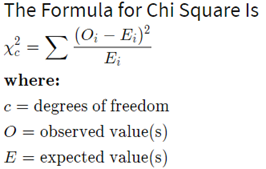

_Let’s consider a scenario where we need to determine the relationship between the independent category feature (predictor) and dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response._

_When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training._

_https://www.youtube.com/watch?v=LE3AIyY_cn8_

In [193]:
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

In [194]:
titanic = sns.load_dataset('titanic')

In [195]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [213]:
# taking categorical variable

data = titanic[['pclass','sex','sibsp','parch', 'embarked','who','alone','survived']]

In [214]:
data.dropna(inplace = True)

In [215]:
data_x = data[['pclass','sex','sibsp','parch', 'embarked','who','alone']]
data_y = data['survived']

In [219]:
sex = {'male':0, 'female':1}
ports = {'S':0, 'C':1,'Q':2}
who = {'man':0, 'woman':1,'child':2}
alone = {True:0, False:1}

data_x['sex'] = data_x['sex'].map(sex)
data_x['embarked'] = data_x['embarked'].map(ports)
data_x['who'] = data_x['who'].map(who)
data_x['alone'] = data_x['alone'].map(alone)

In [222]:
data_x.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,1
1,1,1,1,0,1,1,1
2,3,1,0,0,0,1,0
3,1,1,1,0,0,1,1
4,3,0,0,0,0,0,0


In [223]:
tX_train, tX_test, ty_train, ty_test = train_test_split(data_x,data_y, test_size = 0.2, random_state = 0)

In [224]:
f_score = chi2(tX_train, ty_train)

In [225]:
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  20.32355172]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 6.53907135e-06]))

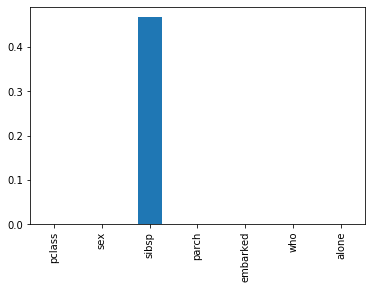

In [226]:
p_val = pd.Series(f_score[1], index = data_x.columns)
p_val.plot.bar()

In [228]:
p_val[p_val<0.05].index

Index(['pclass', 'sex', 'parch', 'embarked', 'who', 'alone'], dtype='object')

In [229]:
%time run_randomForest(tX_train[p_val[p_val<0.05].index], tX_test[p_val[p_val<0.05].index], ty_train, ty_test)

Accuracy:  0.7359550561797753
Wall time: 1.13 s


### ___Multivariate Feature Selection___

#### ___8. Correlated Feature Removal___

_As the number of features increases in the linear space, the performance of the model decreases._

_When there are more features in a dataset, 2 or more features can be correlated. Including all the correlated variables adversely affects the model performance (not in tree based models)._

_So, it becomes important to remove such features and consider the most important feature from the correlated ones._

_To calculate the correlated variables we use:_

```
Pearson Correlation: cov(x,y)/(std(x)*std(y))
```

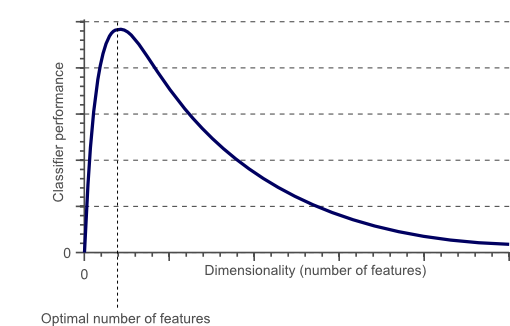

_1. Feature to Target correlation is desired._

_2. Feature to Feature correlation needs to be addressed._

_3. Correlation increases model complexity._

_4. If 2 variables are correlated, then either of them can be included in model._

_5. Removing the redundant features improves model performance._


In [29]:
corrmatrix = X_train_filter.corr()

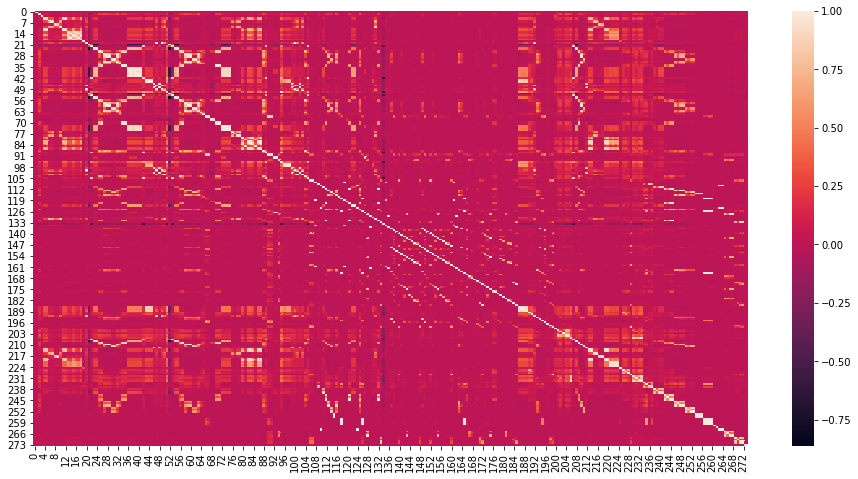

In [30]:
plt.figure(figsize = (16,8))
sns.heatmap(corrmatrix)
plt.show()

In [32]:
corrmatrix_new = np.abs(corrmatrix)

In [35]:
cor_variables = corrmatrix_new[(corrmatrix_new>0.85) & (corrmatrix_new<1)]

In [39]:
def get_correlated_variables(cor_variables):
    cor_variables_set = set()
    for i in range(len(cor_variables.columns)):
        for j in range(i):
            if(pd.notnull(cor_variables.iloc[i,j])):
               cor_variables_set.add(cor_variables.columns[i])
    return cor_variables_set

In [41]:
corr_features = get_correlated_variables(cor_variables)

In [42]:
len(corr_features)

129

In [46]:
corr_feat = cor_variables.stack().reset_index()
corr_feat

,level_0,level_1,0
0,4,5,0.887059
1,4,11,0.965907
2,4,12,0.857453
3,5,4,0.887059
4,5,11,0.854661
...,...,...,...
583,268,267,0.992676
584,271,133,0.905024
585,271,272,0.970078
586,272,133,0.917656


In [47]:
corr_feat.columns = ['Feature1','Feature2', 'Correlation']

In [49]:
grouped_list = []
correlated_feature_list = []
for features in corr_feat.Feature1.unique():
    if features not in grouped_list:
        cor = corr_feat[corr_feat.Feature1 == features]
        grouped_list = grouped_list + list(cor.Feature2.unique()) + [features]
        correlated_feature_list.append(cor)

In [50]:
correlated_feature_list

[   Feature1  Feature2  Correlation
 0         4         5     0.887059
 1         4        11     0.965907
 2         4        12     0.857453,
    Feature1  Feature2  Correlation
 6         6         7     0.863212,
    Feature1  Feature2  Correlation
 8         8         9     0.875337
 9         8       217     0.861562,
     Feature1  Feature2  Correlation
 12        10       131     0.886045,
     Feature1  Feature2  Correlation
 19        13        15     0.890003
 20        13        16     0.998244
 21        13        18     0.882374,
     Feature1  Feature2  Correlation
 22        14        17      0.99926,
     Feature1  Feature2  Correlation
 33        20        47     0.997792
 34        20        49     0.998546
 35        20       100     0.997060,
     Feature1  Feature2  Correlation
 36        21        23     0.861805
 37        21        52     0.921399
 38        21        54     0.861587,
     Feature1  Feature2  Correlation
 39        22        53     0.993612
 4

In [52]:
len(correlated_feature_list)

63

In [53]:
X_train_filter.shape, X_test_filter.shape

((60816, 274), (15204, 274))

_Now we can include one feature from each group based on feature importance using Random Forest Classfier._

In [61]:
important_feat = []
for group in correlated_feature_list:
    features = list(group.Feature1) + list(group.Feature2)
    clf = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
    clf.fit(X_train_filter[features], y_train)
    
    important_Feature = pd.concat([pd.Series(features), pd.Series(clf.feature_importances_)],axis = 1)
    important_Feature.columns = ['Feature', 'Importance']
    important_Feature.sort_values('Importance', ascending = False)
    Feature = important_Feature.iloc[0,0]
    important_feat.append(Feature)

In [65]:
corr_feature_remove = set(corr_features) - set(important_feat)

In [69]:
X_train_filter_uncorr = X_train_filter.drop(columns = corr_feature_remove)
X_test_filter_uncorr = X_test_filter.drop(columns = corr_feature_remove)

#### ___Lets do the another comparison___

In [70]:
# model without filtered data
%time run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9575769534333071
Wall time: 20.6 s


In [71]:
# model without filtered data
%time run_randomForest(X_train_filter_uncorr, X_test_filter_uncorr, y_train, y_test)

Accuracy:  0.9583004472507235
Wall time: 14.6 s
